In [1]:
from plotnine import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas.api.types import CategoricalDtype
from datetime import datetime
import numpy as np
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
filtered_df = pd.read_csv('./0803Data/[Survey]0803_Final_filtered_df.csv',encoding='utf-16')

In [3]:
final_proj = filtered_df['project_id'].unique().tolist()

In [4]:
df = pd.read_csv('./0803Data/analysis_data.csv',encoding='utf-16')

In [5]:
df = df[df['project_id'].isin(final_proj)]
df = df.reset_index(drop=True)

In [6]:
df['success'] = df['success'].apply(lambda x : 'success' if x == 1 else 'fail')

In [7]:
df['duration'].describe()

count    1000.000000
mean       30.718000
std         8.896383
min         7.000000
25%        29.000000
50%        30.000000
75%        31.000000
max        60.000000
Name: duration, dtype: float64

In [8]:
df.groupby(['success'])['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
fail,500.0,32.710,9.861867,8.0,30.0,30.0,35.0,60.0
success,500.0,28.726,7.296671,7.0,26.0,30.0,30.0,60.0


/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 432x288 with 0 Axes>

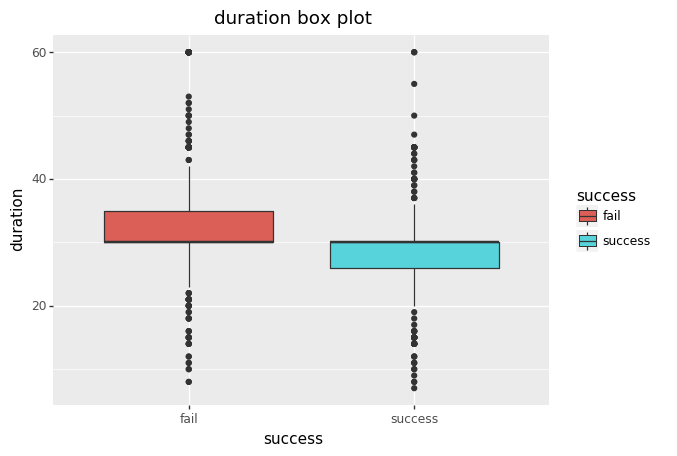

<ggplot: (291488639)>

In [9]:
fig = plt.figure()
# graph 객체 생성
# outlier 제거
video_duration = ggplot(df, aes(x='success', y='duration')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('duration box plot')
video_duration.save('Video duration by success.pdf')
video_duration

In [10]:
df.groupby(['success','super_category'])['duration'].describe()

count       mean        std   min    25%   50%  \
success super_category                                                          
fail    Arts                    51.0  32.509804   8.188706  15.0  30.00  30.0   
        Comics & Illustartion   28.0  32.571429   5.500361  19.0  30.00  31.0   
        Design & Tech          121.0  32.834711  10.921193  10.0  30.00  30.0   
        Film                    63.0  32.206349   9.765242  11.0  30.00  30.0   
        Food & Craft            70.0  33.357143  10.274544  14.0  30.00  30.0   
        Games                   90.0  32.433333   8.460151  11.0  30.00  30.0   
        Music                   28.0  33.642857  14.384184   8.0  29.50  30.0   
        Publishing              49.0  32.387755  10.010029  10.0  30.00  30.0   
success Arts                    50.0  27.960000   6.134413  10.0  27.00  30.0   
        Comics & Illustartion   63.0  27.555556   6.920698   7.0  26.00  30.0   
        Design & Tech          100.0  31.460000   6.325226  14.0  30.00  30.0   
        Film                    50.0  29.400000   5.573260  20.0  25.25  30.0   
        Food & Craft            37.0  31.432432   8.574965  14.0  30.00  30.0   
        Games                   99.0  25.252525   6.952233   8.0  21.00  29.0   
        Music                   56.0  29.625000   9.122525  14.0  25.75  30.0   
        Publishing              45.0  28.688889   6.594840  11.0  29.00  30.0   

                                 75%   max  
success super_category                      
fail    Arts                   34.50  60.0  
        Comics & Illustartion  35.00  45.0  
        Design & Tech          35.00  60.0  
        Film                   33.00  60.0  
        Food & Craft           35.00  60.0  
        Games                  31.00  60.0  
        Music                  33.00  60.0  
        Publishing             35.00  60.0  
success Arts                   30.00  47.0  
        Comics & Illustartion  30.00  43.0  
        Design & Tech          34.00  50.0  
        Film                   30.75  45.0  
        Food & Craft           31.00  60.0  
        Games                  30.00  42.0  
        Music                  31.00  60.0  
        Publishing             30.00  45.0

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Category video duration by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 432x288 with 0 Axes>

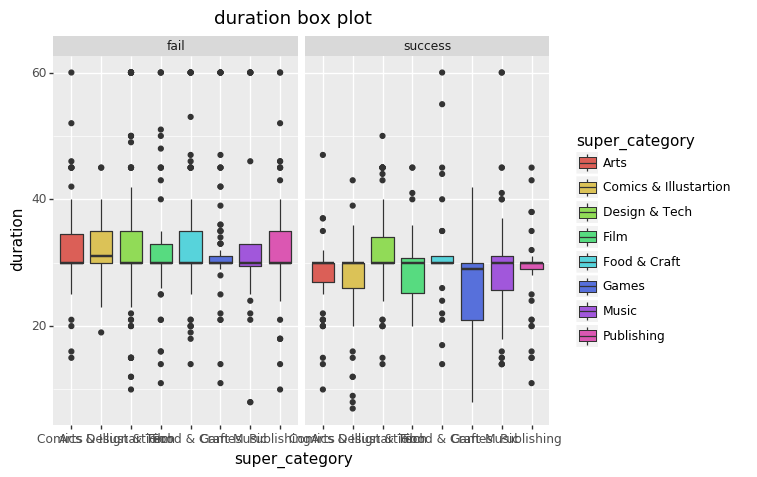

<ggplot: (-9223372036563437010)>

In [11]:
fig = plt.figure()
# graph 객체 생성
cat_duration = ggplot(df, aes(x='super_category', y='duration')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('duration box plot') \
    + facet_wrap('~success')
cat_duration.save('Category video duration by success.pdf')
cat_duration